### Genetic Algorithm

In [199]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

nbGenerations = 100
nbIndividuals = 100

# Parameters
mutation_chance = 0.1
retain = 0.2
retain_bad = 0.05
population_count = 100
generation_count = 1000
days = 365
happiness_rate = 0.9

# Variables
retain_count = int(population_count * retain)
cursor = int(days/2)
choice = lambda x: x[int(random.random() * len(x))]

In [93]:
class Depressive():
    
    def __init__(self, actions, fitness):
        self.actions = actions
        self.fitness = fitness
        
    def __eq__(self, other):
        if (isinstance(other, Depressive)):
            return self.actions == other.actions

In [185]:
import random

def GenerateDepressives(depressives):
    for x in range(nbIndividuals):
        actions = []
        for d in range(days):
            if random.random() < happiness_rate:
                actions.append(0)
            else:
                actions.append(1)
        depressives.append(Depressive(actions, 0))

In [201]:
def EvolvePopulation(individuals):
    yaxis = []
    for x in range(generation_count):
        # Get Fitness and sort individuals
        for individual in individuals:
            fitness = 0
            for a in individual.actions:
                if a == 0:
                    fitness += 1
                else:
                    break
            individual.fitness = fitness
        individuals.sort(key=lambda x: x.fitness, reverse=True)
        
        # Print average Fitness
        somme = 0
        for individual in individuals:
            somme += individual.fitness
        print("\tValue : ", somme/len(individuals))
        yaxis.append(somme/len(individuals))


        # Select parents
        parents = individuals[:retain_count]

        # Randomly add individuals
        for individual in individuals[retain_count:]:
            if random.random() < retain_bad:
                parents.append(individual)
        
        # Mutate
        for individual in parents:
            if random.random() < mutation:
                rand = random.sample(range(0, days), 2)
                individual.actions[rand[0]], individual.actions[rand[1]] = individual.actions[rand[1]], individual.actions[rand[0]]

        # Crossover
        desired = nbIndividuals - len(parents)
        children = []
        while len(children) < desired:
            p1 = choice(parents)
            p2 = choice(parents)
            cursor = random.randint(0, len(p1.actions))
            if p1 == p2:
                child = Depressive(p1.actions[:cursor] + p2.actions[cursor:], 0)
                children.append(child)
        parents.extend(children)
        individuals = parents
    return(yaxis)
    

	Value :  8.52
	Value :  19.14
	Value :  35.27
	Value :  38.78
	Value :  40.15
	Value :  43.25
	Value :  44.0
	Value :  44.0
	Value :  43.28
	Value :  43.76
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  43.9
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  44.0
	Value :  43.97
	Value :  44.0
	Value :  44.0
	Value :  44.04
	Value :  44.04
	Value :  44.16
	Value :  44.52
	Value :  46.96
	Value :  48.0
	Value :  48.0
	Value :  48.0
	Value :  48.0
	Value :  48.0
	Value :  48.0
	Value :  48.0
	Value :  48.0
	Value :  48.0
	Value :  48.0
	Value :  48.0
	Value :  48.0
	Value :  48.0
	Value :  48.0
	Value :  48.0
	Value :  48.0
	Value :  48

	Value :  109.0
	Value :  109.0
	Value :  108.65
	Value :  109.0
	Value :  109.0
	Value :  109.0
	Value :  109.0
	Value :  109.0
	Value :  106.33
	Value :  109.0
	Value :  108.33
	Value :  109.0
	Value :  109.0
	Value :  109.0
	Value :  109.0
	Value :  109.0
	Value :  108.52
	Value :  109.0
	Value :  109.0
	Value :  109.17
	Value :  109.17
	Value :  109.17
	Value :  109.17
	Value :  108.42
	Value :  109.17
	Value :  109.34
	Value :  110.19
	Value :  117.84
	Value :  125.15
	Value :  125.83
	Value :  126.0
	Value :  126.0
	Value :  126.0
	Value :  126.0
	Value :  126.0
	Value :  126.0
	Value :  126.0
	Value :  126.0
	Value :  126.0
	Value :  126.0
	Value :  126.0
	Value :  124.92
	Value :  126.0
	Value :  126.0
	Value :  126.0
	Value :  126.0
	Value :  124.94
	Value :  126.0
	Value :  126.0
	Value :  126.22
	Value :  126.22
	Value :  126.22
	Value :  126.22
	Value :  126.22
	Value :  126.22
	Value :  126.22
	Value :  126.22
	Value :  126.22
	Value :  126.22
	Value :  126.22
	Value :  12

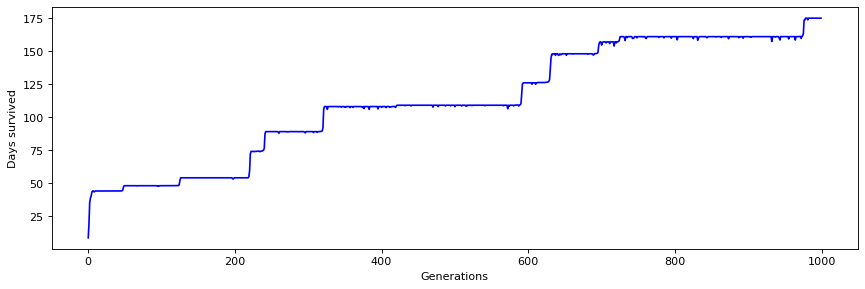

In [205]:
individuals = []
GenerateDepressives(individuals)
yaxis = EvolvePopulation(individuals)

figure(figsize=(13, 4), dpi=80)
plt.plot(range(generation_count), yaxis, "b-")
plt.xlabel("Generations")
plt.ylabel("Days survived")
plt.show()